In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2, chi2_contingency

In this project we want to add some fake data to the adult data set. We want to do this because the data is highly inbalanced in regard to the sensitive attributes race and gender.
To avoid changing the underlying distribution of the data we want to use existing entries in our data set and change attributes which aren't significantly influencing the class label to create new entries.
<br>
<br>
To find out which attributes aren't influencing the class label strongly we will do hypothesis testing for each attribute. We will then only change attributes where the null hypothesis couldn't be rejected.

In [2]:
adult = pd.read_csv("../data sets/adult.csv")
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income-per-year'],
      dtype='object')

### Hypothesis test for age <br>
Choosen test: Two-Sample t-Test <br>
The two-sample t-test is used to determine if two population means are equal. 

In [3]:
low_income = adult[adult['income-per-year']=='<=50K']['age']
high_income = adult[adult['income-per-year']=='>50K']['age']
high_income = high_income.values.tolist()
high_income = random.sample(high_income, 1000)
low_income = low_income.values.tolist()
low_income = random.sample(low_income, 1000)
ttest,pval = ttest_ind(low_income,high_income,equal_var = False)
print("ttest",ttest)
print('p value',pval)
if pval <0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

ttest -12.906725172632974
p value 1.506031683636068e-36
null hypothesis rejected


Null hypothesis was rejected so we can't change education for creating fake data

### Hypothesis test for workclass <br>
Choosen test: χ2 test <br>
Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance

In [117]:
def orderValues(x_labels, bars1):
    dict = {}
    for label, bar in zip(x_labels, bars1):
        print
        dict[label] = bar

    sortedValues = sorted(dict.items(), key=lambda x: x[1], reverse=True)
    bars1 = []
    x_labels = []
    for val in sortedValues:
        x_labels.append(val[0])
        bars1.append(val[1])
    return x_labels, bars1

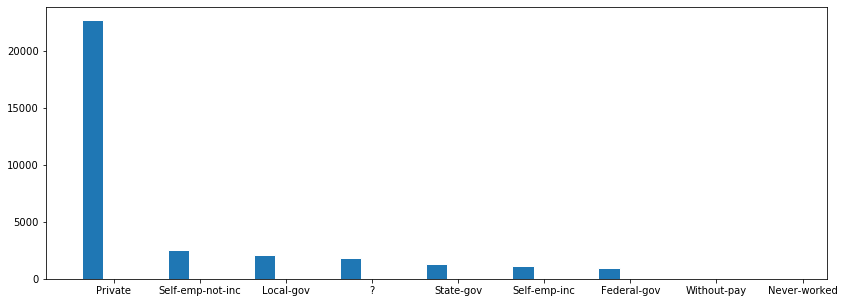

In [118]:
barWidth = 0.25
bars1 = [np.sum(adult['workclass'] == wc) for wc in pd.unique(adult['workclass'])]
x_labels = pd.unique(adult['workclass'])
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (14,5)
plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()


Distribution is χ2 distributed therefore we can use χ2 test

In [5]:
table = pd.crosstab(adult['workclass'].sample(frac=0.002, replace=True, random_state=1),adult['income-per-year'].sample(frac=0.002, replace=True, random_state=1),margins = False)
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
# a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('null hypothesis rejected')
else:
	print('null hypothesis accepted')

null hypothesis accepted


Null hypothesis was accepted. This means we can change workclass for data augmentation

### Hypothesis test for final weight <br>
Choosen test: Two-Sample t-Test <br>
The two-sample t-test is used to determine if two population means are equal.

In [6]:
low_income = adult[adult['income-per-year']=='<=50K']['fnlwgt']
high_income = adult[adult['income-per-year']=='>50K']['fnlwgt']
high_income = high_income.values.tolist()
high_income = random.sample(high_income, 1000)
low_income = low_income.values.tolist()
low_income = random.sample(low_income, 1000)
ttest,pval = ttest_ind(low_income,high_income,equal_var = False)
print("ttest",ttest)
print('p value',pval)
if pval <0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

ttest -0.6193632944660274
p value 0.5357476753203714
null hypothesis accepted


Null hypothesis was accepted. This means we can change fnlwgt for data augmentation

### Hypothesis test for education <br>
Choosen test: χ2 test <br>
Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance

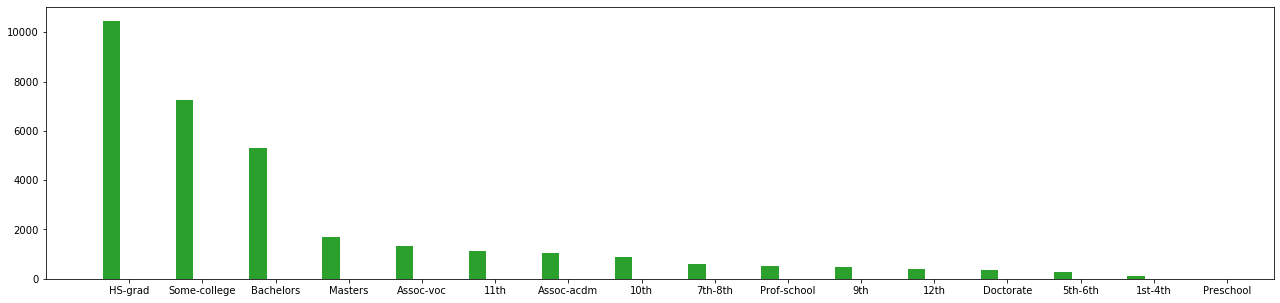

In [119]:
barWidth = 0.25
bars1 = [np.sum(adult['education'] == ed) for ed in pd.unique(adult['education'])]
x_labels = pd.unique(adult['education'])
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (22,5)
plt.bar(r1, bars1, color='tab:green', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()

Distribution is χ2 distributed therefore we can use χ2 test

In [9]:
table = pd.crosstab(adult['education'].sample(frac=0.25, replace=True, random_state=1),adult['income-per-year'].sample(frac=0.25, replace=True, random_state=1),margins = False)
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
# a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('null hypothesis rejected')
else:
	print('null hypothesis accepted')

null hypothesis rejected


Null hypothesis was rejected so we can't change education for creating fake data

### Hypothesis test for marital-status <br>
Choosen test: χ2 test <br>
Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance

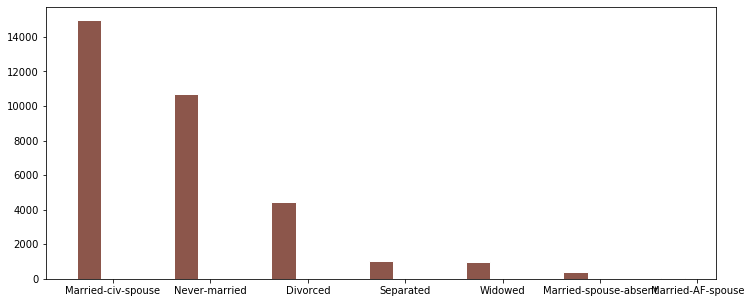

In [120]:
barWidth = 0.25
bars1 = [np.sum(adult['marital-status'] == ed) for ed in pd.unique(adult['marital-status'])]
x_labels = pd.unique(adult['marital-status'])
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (12,5)
plt.bar(r1, bars1, color='tab:brown', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()

Distribution is χ2 distributed therefore we can use χ2 test

In [15]:
table = pd.crosstab(adult['marital-status'].sample(frac=0.25, replace=True, random_state=1),adult['income-per-year'].sample(frac=0.25, replace=True, random_state=1),margins = False)
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
# a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('null hypothesis rejected')
else:
	print('null hypothesis accepted')

null hypothesis rejected


Null hypothesis was rejected so we can't change marital-status for creating fake data

### Hypothesis test for occupation <br>
Choosen test: χ2 test <br>
Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance

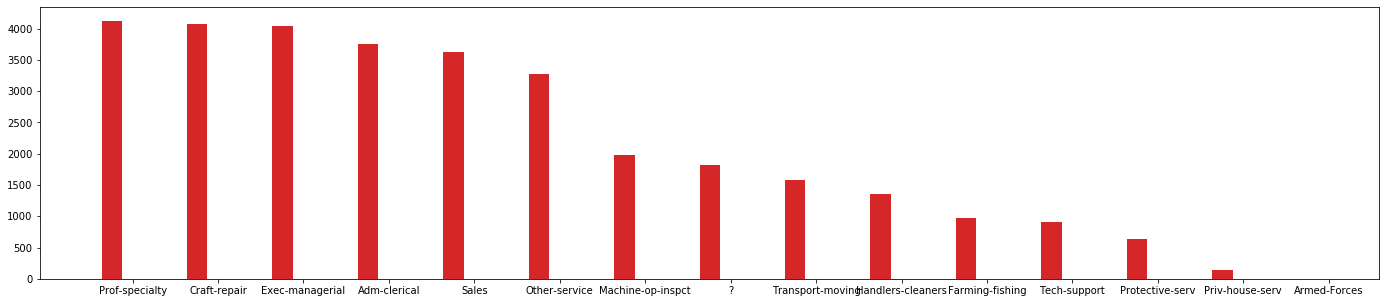

In [128]:
barWidth = 0.25
bars1 = [np.sum(adult['occupation'] == oc) for oc in pd.unique(adult['occupation'])]
x_labels = pd.unique(adult['occupation'])
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (24,5)
plt.bar(r1, bars1, color='tab:red', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()

Distribution is χ2 distributed therefore we can use χ2 test

In [129]:
table = pd.crosstab(adult['occupation'].sample(frac=0.25, replace=True, random_state=1),adult['income-per-year'].sample(frac=0.25, replace=True, random_state=1),margins = False)
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
# a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('null hypothesis rejected')
else:
	print('null hypothesis accepted')

null hypothesis rejected


Null hypothesis was rejected so we can't change occupation for creating fake data

## We don't need tests for 'relationship', 'race' or 'sex' because 'race' and 'sex' are sensitive attributes and will be removed. Also the gender can be derived from 'relationship', so the benchmark also removes this attribute!!!

### Hypothesis test for capital-gain <br>
Choosen test: Two-Sample t-Test <br>
The two-sample t-test is used to determine if two population means are equal.

In [135]:
low_income = adult[adult['income-per-year']=='<=50K']['capital-gain']
high_income = adult[adult['income-per-year']=='>50K']['capital-gain']
high_income = high_income.values.tolist()
high_income = random.sample(high_income, 1000)
low_income = low_income.values.tolist()
low_income = random.sample(low_income, 1000)
ttest,pval = ttest_ind(low_income,high_income,equal_var = False)
print("ttest",ttest)
print('p value',pval)
if pval <0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

ttest -8.73819771460969
p value 9.794743336917e-18
null hypothesis rejected


Null hypothesis was rejected so we can't change capital-gain for creating fake data

### Hypothesis test for capital-loss <br>
Choosen test: Two-Sample t-Test <br>
The two-sample t-test is used to determine if two population means are equal.

In [133]:
low_income = adult[adult['income-per-year']=='<=50K']['capital-loss']
high_income = adult[adult['income-per-year']=='>50K']['capital-loss']
high_income = high_income.values.tolist()
high_income = random.sample(high_income, 1000)
low_income = low_income.values.tolist()
low_income = random.sample(low_income, 1000)
ttest,pval = ttest_ind(low_income,high_income,equal_var = False)
print("ttest",ttest)
print('p value',pval)
if pval <0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

ttest -6.36568965336087
p value 2.572694288697605e-10
null hypothesis rejected


Null hypothesis was rejected so we can't change capital-loss for creating fake data

### Hypothesis test for hours-per-week <br>
Choosen test: Two-Sample t-Test <br>
The two-sample t-test is used to determine if two population means are equal.

In [137]:
low_income = adult[adult['income-per-year']=='<=50K']['hours-per-week']
high_income = adult[adult['income-per-year']=='>50K']['hours-per-week']
high_income = high_income.values.tolist()
high_income = random.sample(high_income, 1000)
low_income = low_income.values.tolist()
low_income = random.sample(low_income, 1000)
ttest,pval = ttest_ind(low_income,high_income,equal_var = False)
print("ttest",ttest)
print('p value',pval)
if pval <0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

ttest -11.856987673563266
p value 2.2551699558289064e-31
null hypothesis rejected


Null hypothesis was rejected so we can't change hours-per-week for creating fake data

### Hypothesis test for native-country <br>
Choosen test: χ2 test <br>
Pearson's chi-squared test is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance

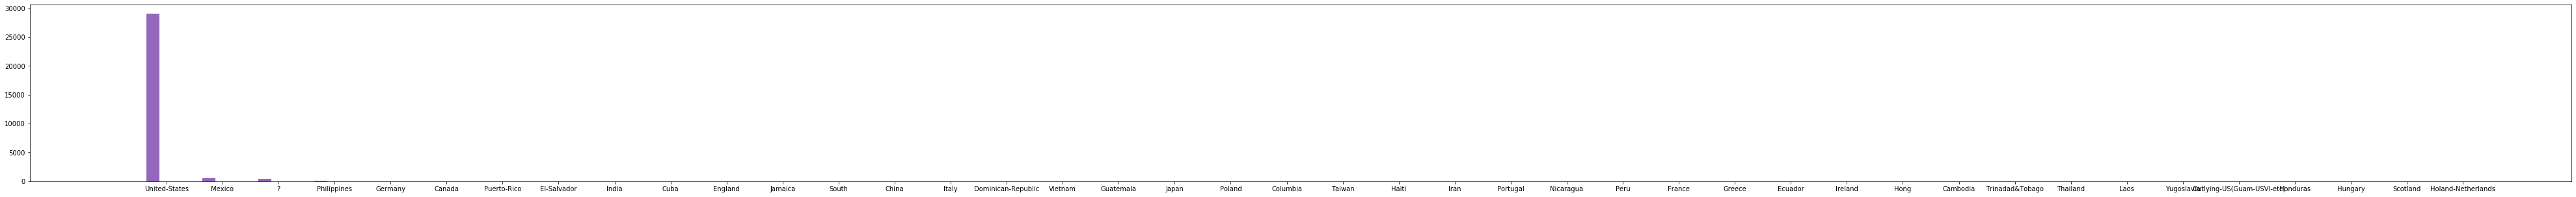

In [130]:
barWidth = 0.25
bars1 = [np.sum(adult['native-country'] == nc) for nc in pd.unique(adult['native-country'])]
x_labels = pd.unique(adult['native-country'])
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (70,5)
plt.bar(r1, bars1, color='tab:purple', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()

Remove United-States from Plot to see the other countries...

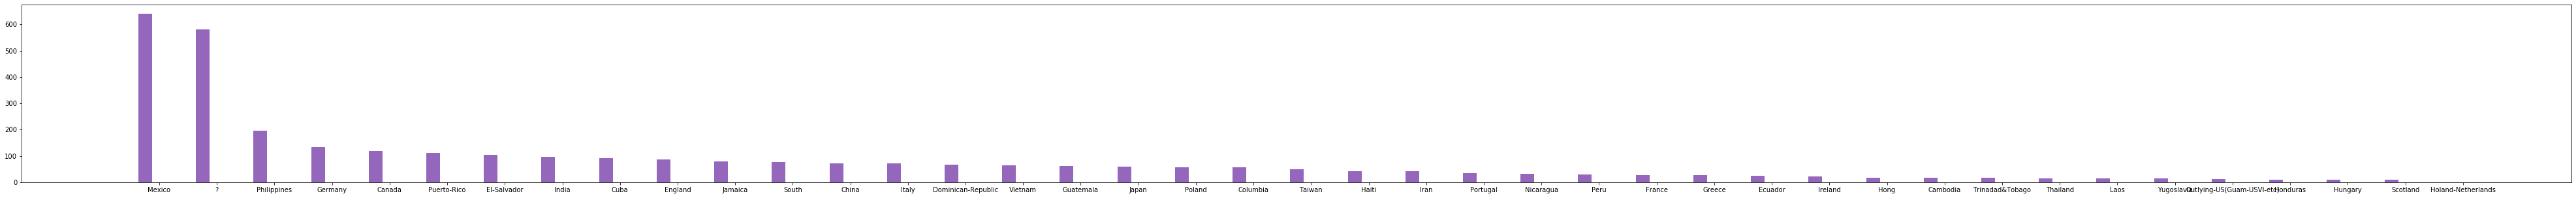

In [131]:
barWidth = 0.25
bars1 = [np.sum(adult['native-country'] == nc) for nc in pd.unique(adult['native-country'])]
bars1.remove(max(bars1))
x_labels = pd.unique(adult['native-country']).tolist()
x_labels.remove('United-States')
r1 = np.arange(len(bars1))

x_labels, bars1 = orderValues(x_labels, bars1)

plt.rcParams["figure.figsize"] = (70,5)
plt.bar(r1, bars1, color='tab:purple', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.show()

Distribution is χ2 distributed therefore we can use χ2 test

In [132]:
table = pd.crosstab(adult['occupation'].sample(frac=0.25, replace=True, random_state=1),adult['income-per-year'].sample(frac=0.25, replace=True, random_state=1),margins = False)
stat, p, dof, expected = chi2_contingency(table)
prob = 0.95
# a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('null hypothesis rejected')
else:
	print('null hypothesis accepted')

null hypothesis rejected


Null hypothesis was rejected so we can't change education for creating fake data

## Outcome:
### After the experiments we saw that we can only manipulate worklass and fnlwgt to create fake data. But changing fnlwgt will propably add no diversity to our data which is the goal of data augmentation. 
### So our result after these experiments is, that data augmentation on the adult data set won't increase the diversity in the training data and therefore won't lead to a fairer classifier